In [1]:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
import array as arr
from scipy import optimize
from scipy.optimize import curve_fit
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel

def coarseBackgroundModel(x,y,deg,signal_range):
    """
    coarse fit of a polynomial model to the entire data for a first background reduction:

    x: v_LSR
    y: T_A
    deg: degree of the polynom to fit to the data

    """
    # set up polynomial model
    poly_mod = PolynomialModel(deg, prefix='p1_')

    mask= ((x<signal_range[0]) | (x>signal_range[1]))
    x_ = x[mask]
    y_ = y[mask]

    # let lmfit guess the parameter values:
    p_bg = poly_mod.guess(y_, x=x_)

    # set up our background model (only polynomial here):
    mod_bg = poly_mod

    # initialize the model with the guessed parameters:
    init_bg = mod_bg.eval(p_bg, x=x_)

    # fit the model:
    out_bg = mod_bg.fit(y_, p_bg, x=x_)

    # return results:
    return p_bg, out_bg, mod_bg

def coarseBackgroundModel2(x,y,deg,signal_range):
    """
    coarse fit of a polynomial model to the entire data for a first background reduction:

    x: v_LSR
    y: T_A
    deg: degree of the polynom to fit to the data

    """
    # set up polynomial model
    poly_mod = PolynomialModel(deg, prefix='p1_')

    mask= ((((x<signal_range[0]) | (x>signal_range[1])) & ((x<signal_range[2]) | (x>signal_range[3]))) & ((x<signal_range[4]) | (x>signal_range[5])))
    x_ = x[mask]
    y_ = y[mask]

    # let lmfit guess the parameter values:
    p_bg = poly_mod.guess(y_, x=x_)

    # set up our background model (only polynomial here):
    mod_bg = poly_mod

    # initialize the model with the guessed parameters:
    init_bg = mod_bg.eval(p_bg, x=x_)

    # fit the model:
    out_bg = mod_bg.fit(y_, p_bg, x=x_)

    # return results:
    return p_bg, out_bg, mod_bg

def gerade(x,m,b):
    y=m*x+b
    return y

In [2]:
pathlist= glob.glob("./A107/"+"*.txt")

In [3]:
for path in pathlist:
    print(path)

./A107/1-links-ba.txt
./A107/1-links-na.txt
./A107/1-r-na-nv.txt
./A107/1-rechts-ba.txt
./A107/1-rechts-na-2.txt
./A107/2-links-na-cut.txt
./A107/2-rechts-na-cut.txt
./A107/3-links-detektor_vergl-60s-ba.txt
./A107/3-rechts-detektor_vergl-60s-ba.txt
./A107/Lebensdauer.txt
./A107/promtkurve.txt
./A107/startsignal.txt
./A107/stoppsignal.txt
./A107/stoppsignal2.txt


In [4]:
nar1=np.loadtxt("./A107/1-links-na.txt")
chanel_nar1=nar1[:,0]
count_nar1=nar1[:,1]
#plt.figure(figsize=(12,6))
#plt.title('Verschobenes Natriumspektrum am rechten Detektor',fontsize=10)
#plt.plot(chanel_nar1,count_nar1,"b-",linewidth=.5,)
#plt.xlabel('Chanel')
#plt.ylabel('Count')
#plt.grid()
#plt.show

#nal1=np.loadtxt("./A107/1-links-na.txt")
#chanel_nal1=nal1[:,0]
#count_nal1=nal1[:,1]
#plt.figure(figsize=(12,6))
#plt.title('Verschobenes Natriumspektrum am linken Detektor',fontsize=10)
#plt.plot(chanel_nal1,count_nal1,"b-",linewidth=.5,)
#plt.xlabel('Chanel')
#plt.ylabel('Count')
#plt.grid()
#plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

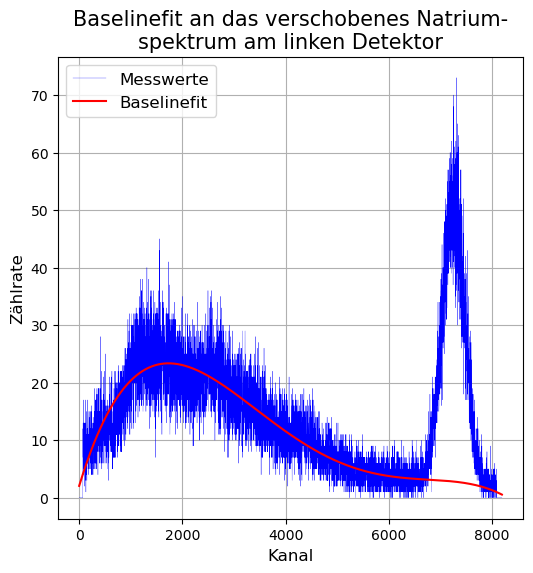

In [5]:
x=chanel_nar1
y=count_nar1
signal_range=[6500,8000]
p_bg, out_bg, mod_bg = coarseBackgroundModel(x,y,5,signal_range)  
background = mod_bg.eval(p_bg,x=x)
plt.figure(figsize=(6,6))
plt.title('Baselinefit an das verschobenes Natrium-\nspektrum am linken Detektor',fontsize=15)
plt.plot(x,y,"b-",linewidth=.2,label="Messwerte",)
plt.plot(x,background,"r-",label="Baselinefit",)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('NABaselineLinks.png')
plt.show

[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 50
    # data points      = 8192
    # variables        = 3
    chi-square         = 132992.524
    reduced chi-square = 16.2403864
    Akaike info crit   = 22838.2087
    Bayesian info crit = 22859.2414
    R-squared          = 0.85732704
[[Variables]]
    g1_amplitude:  25895.7766 +/- 136.144547 (0.53%) (init = 50)
    g1_center:     7255.42077 +/- 1.30302381 (0.02%) (init = 7400)
    g1_sigma:      214.640206 +/- 1.30301087 (0.61%) (init = 400)
    g1_fwhm:       505.439050 +/- 3.06835606 (0.61%) == '2.3548200*g1_sigma'
    g1_height:     48.1313396 +/- 0.25304526 (0.53%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.500)
    C(g1_amplitude, g1_sigma) = +0.5773


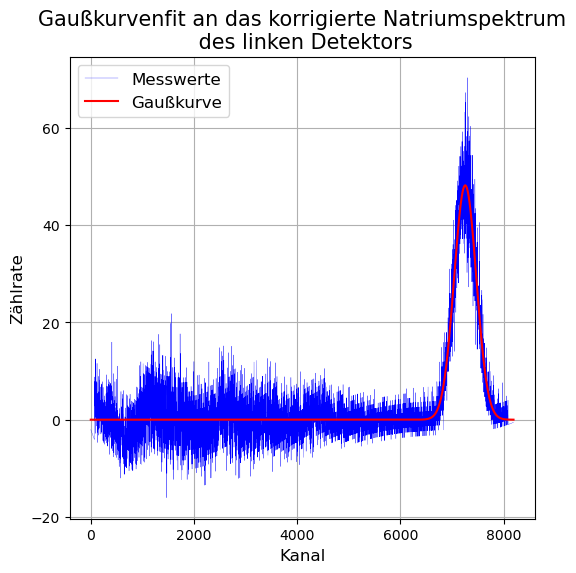

In [6]:
x1 = x
y1 = y-background

model = (GaussianModel(prefix='g1_'))

params = model.make_params(g1_amplitude=50,
                           g1_center=7400,
                           g1_sigma=400)

result = model.fit(y1, params, x=x1)
print(result.fit_report(min_correl=0.5))

lolo1=[]
lala1=[]
for name,param in result.params.items():
    if result.errorbars==True:
        lala1.append(param.stderr)
    else:
        lala1.append(0)
    lolo1.append(param.value)

comps = result.eval_components(x=x1)
dely = result.eval_uncertainty(sigma=3)

ergebnis = model.eval(params,x=x1)
plt.figure(figsize=(6,6))
plt.title('Gaußkurvenfit an das korrigierte Natriumspektrum\n des linken Detektors',fontsize=15)
plt.plot(x,y-background,"b-",linewidth=.2,label="Messwerte",)
plt.plot(x,result.best_fit,"r-",label="Gaußkurve",)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.grid()
plt.legend(fontsize=12)
plt.savefig('NAGaussLinks.png')
plt.show
with open('fitparameter_na_links'+'.txt','w') as f:
    for name in result.best_values:
        f.write(str(name)+'\t'+str(np.round(result.best_values[name],4))+'\n')

[[Model]]
    ((Model(gaussian, prefix='g1_') + Model(gaussian, prefix='g2_')) + Model(gaussian, prefix='g3_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 280
    # data points      = 8192
    # variables        = 9
    chi-square         = 11134834.9
    reduced chi-square = 1360.72771
    Akaike info crit   = 59120.6232
    Bayesian info crit = 59183.7214
    R-squared          = 0.98492851
[[Variables]]
    g1_amplitude:  279765.516 +/- 507.730134 (0.18%) (init = 3000)
    g1_center:     394.010856 +/- 0.07466262 (0.02%) (init = 500)
    g1_sigma:      35.6283935 +/- 0.07466339 (0.21%) (init = 35)
    g2_amplitude:  146118.769 +/- 601.576179 (0.41%) (init = 1200)
    g2_center:     1177.20493 +/- 0.23777772 (0.02%) (init = 1200)
    g2_sigma:      50.0168175 +/- 0.23777530 (0.48%) (init = 100)
    g3_amplitude:  114807.537 +/- 1074.17452 (0.94%) (init = 600)
    g3_center:     5112.81431 +/- 1.72287204 (0.03%) (init = 5200)
    g3_sigma:      159.46

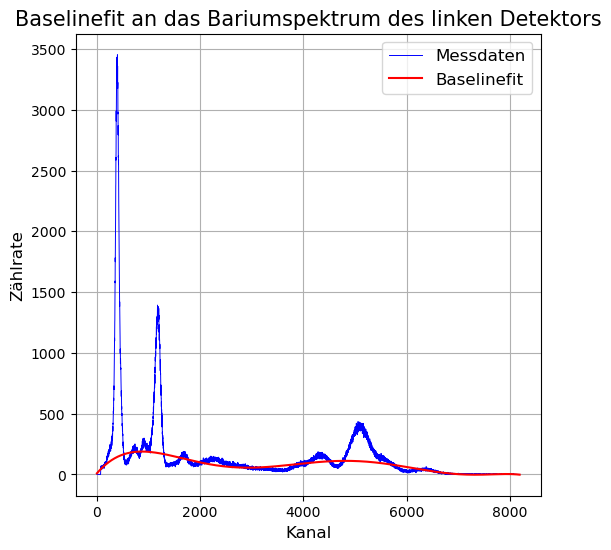

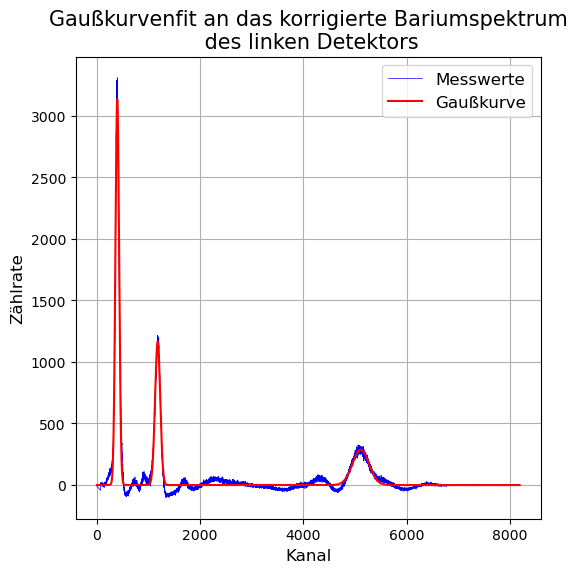

In [7]:
nar1=np.loadtxt("./A107/1-links-ba.txt")
chanel_nar1=nar1[:,0]
count_nar1=nar1[:,1]
#plt.figure(figsize=(12,6))
#plt.title('Bariumspektrum am rechten Detektor',fontsize=15)
#plt.plot(chanel_nar1,count_nar1,"b-",linewidth=.5,)
#plt.xlabel('Chanel',fontsize=12)
#plt.ylabel('Count',fonsize=12)
#plt.legend(fontsize=12)
#plt.grid()
#plt.show



x=chanel_nar1
y=count_nar1
signal_range=[200,650,1050,1300,4800,5400]
p_bg, out_bg, mod_bg = coarseBackgroundModel2(x,y,7,signal_range)  
background = mod_bg.eval(p_bg,x=x)
plt.figure(figsize=(6,6))
plt.title('Baselinefit an das Bariumspektrum des linken Detektors',fontsize=15)
plt.plot(x,y,"b-",linewidth=.7,label="Messdaten")
plt.plot(x,background,"r-",label="Baselinefit")
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('BABaselineLinks.png')
plt.show

#plt.figure(figsize=(12,6))
#plt.title('Verschobenes Natriumspektrum am linken Detektor',fontsize=10)
#plt.plot(x,y-background,"b-",linewidth=.5,)
#plt.xlabel('Chanel')
#plt.ylabel('Count')
#plt.grid()
#plt.show



x1 = x
y1 = y-background

model = (GaussianModel(prefix='g1_')+
        GaussianModel(prefix='g2_')+
        GaussianModel(prefix='g3_'))

params = model.make_params(g1_amplitude=3000,
                           g1_center=500,
                           g1_sigma=35,
                           g2_amplitude=1200,
                           g2_center=1200,
                           g2_sigma=100,
                           g3_amplitude=600,
                           g3_center=5200,
                           g3_sigma=150)

result = model.fit(y1, params, x=x1)
print(result.fit_report(min_correl=0.5))

lolo2=[]
lala2=[]
for name,param in result.params.items():
    if result.errorbars==True:
        lala2.append(param.stderr)
    else:
        lala2.append(0)
    lolo2.append(param.value)

comps = result.eval_components(x=x1)
dely = result.eval_uncertainty(sigma=3)

ergebnis = model.eval(params,x=x1)
plt.figure(figsize=(6,6))
plt.title('Gaußkurvenfit an das korrigierte Bariumspektrum\n des linken Detektors',fontsize=15)
plt.plot(x,y-background,"b-",linewidth=.5,label="Messwerte",)
plt.plot(x,result.best_fit,"r-",label="Gaußkurve",)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
#plt.xticks(np.arange(0,8000,300))
plt.grid()
plt.legend(fontsize=12)
plt.savefig('BAGaussLinks.png')
plt.show
with open('fitparameter_ba_links'+'.txt','w') as f:
    for name in result.best_values:
        f.write(str(name)+'\t'+str(np.round(result.best_values[name],4))+'\n')

In [8]:
centers=[]
sigmas=[]
energies=[511,31,81,356]

indices=[1,4,7]
centers.append(lolo1[1])
sigmas.append(lolo1[2])

for i in indices:
    centers.append(lolo2[i])
    sigmas.append(lolo2[i+1])

print(centers)
print(sigmas)



[7255.420766506598, 394.0108564887297, 1177.2049329075091, 5112.8143110567335]
[214.64020604768575, 35.62839351609383, 50.01681750068878, 159.4673401196607]


Durch die Anpassung bestimmte Parameter: [0.07004254 0.6613759 ] +/- [6.18909184e-04 2.77342849e+00] nm


<function matplotlib.pyplot.show(close=None, block=None)>

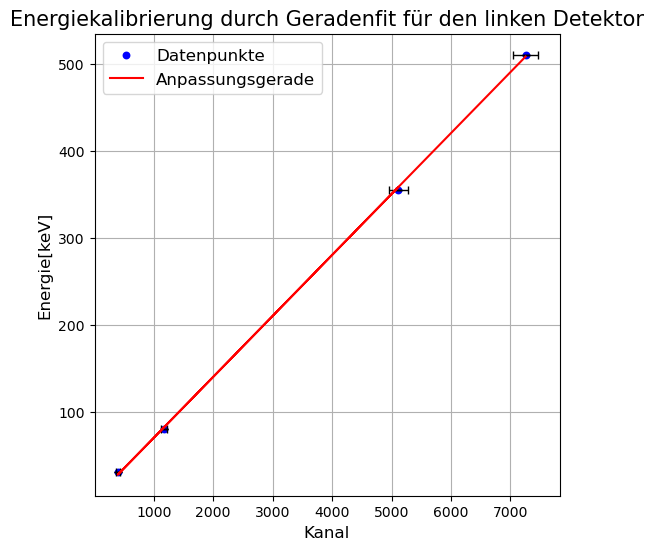

In [9]:
Er=[0,0,0,0]
s=[]
anpassungs_werte, co_var = curve_fit(gerade,centers,energies)
perr= np.sqrt(np.diag(co_var))
print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
#Rfit    = funktion(U2[h], *anpassungs_werte)
Rfit=[]
for E in centers:
    Rfit.append(gerade(E, *anpassungs_werte))

plt.figure(figsize=(6,6))
plt.title('Energiekalibrierung durch Geradenfit für den linken Detektor',fontsize=15)
plt.plot(centers,energies,"b .",markersize=8,markeredgewidth=1.65,label="Datenpunkte",)
plt.errorbar(centers,energies,Er,sigmas,'k.',capsize=3,elinewidth=1,markersize=0,)
plt.plot(centers,Rfit,'r-',label='Anpassungsgerade')
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Energie[keV]',fontsize=12)
plt.legend(fontsize=12)
plt.grid()
plt.savefig('EnergiekalibrierungLinks.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

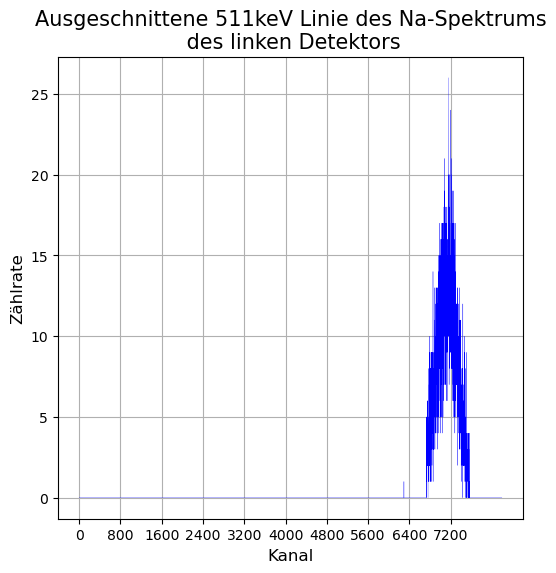

In [10]:
nar1=np.loadtxt("./A107/2-links-na-cut.txt")
chanel=nar1[:,0]
count=nar1[:,1]

plt.figure(figsize=(6,6))
plt.title('Ausgeschnittene 511keV Linie des Na-Spektrums\n des linken Detektors',fontsize=15)
plt.plot(chanel,count,"b-",linewidth=.2,)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.xticks(np.arange(0, 8000, 800))
plt.grid()
plt.savefig('NACutLinks.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

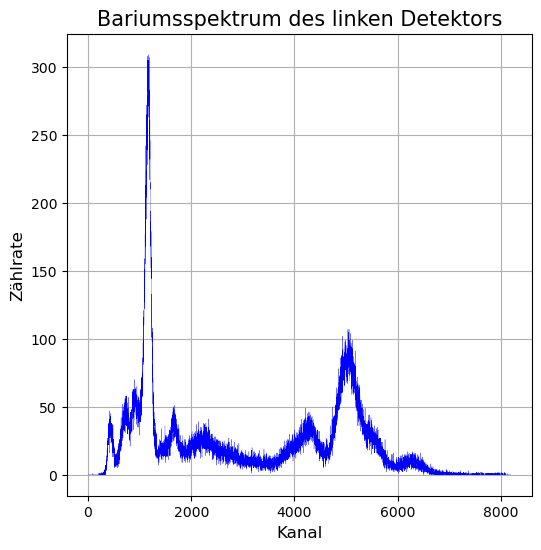

In [11]:
nar1=np.loadtxt("./A107/3-links-detektor_vergl-60s-ba.txt")
chanel=nar1[:,0]
count=nar1[:,1]

plt.figure(figsize=(6,6))
plt.title('Bariumsspektrum des linken Detektors',fontsize=15)
plt.plot(chanel,count,"b-",linewidth=.2,)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.grid()
plt.savefig('BAVergleichLinks.png')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

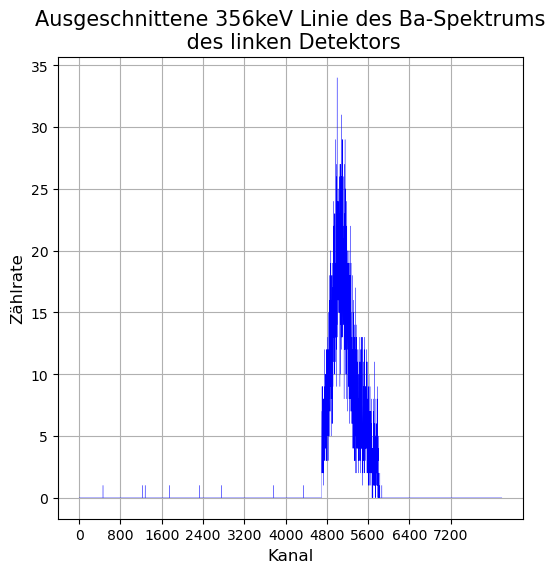

In [12]:
nar1=np.loadtxt("./A107/startsignal.txt")
chanel=nar1[:,0]
count=nar1[:,1]

plt.figure(figsize=(6,6))
plt.title('Ausgeschnittene 356keV Linie des Ba-Spektrums\n des linken Detektors',fontsize=15)
plt.plot(chanel,count,"b-",linewidth=.2,)
plt.xlabel('Kanal',fontsize=12)
plt.ylabel('Zählrate',fontsize=12)
plt.xticks(np.arange(0, 8000, 800))
plt.grid()
plt.savefig('BACutLinks.png')
plt.show

In [13]:
fwhm=[83.9,117.8,375.5,505.4]
fwhmer=[0.2,0.5,4.1,3.1]
for i in range(0,4):
    print(0.07004254*fwhm[i])
    print(0.07004254*fwhmer[i])

5.876569106000001
0.014008508000000001
8.251011212
0.03502127
26.30097377
0.287174414
35.399499716
0.217131874


In [14]:
print(0.07004254*5830+0.6613759)

409.0093841
